---
## **Training a High Dimensional SVM Classifier**
---

<font size="2">Eudald Sangenis  
Creation: 7/12/2022  
Last Update: 7/18/2022  

The objective of this file is to train a High Dimensional SVM classifier.

Parameters High Dimensional Dataset:  
- 2 magnitude signals  
- 200 samples window of time  

Once this classifier is trained the next step is to predict the labels and verify the navigation solution.</font>

---
## **<font size="5">1. Libraries</font>**
---

In [1]:
import pickle
import math as m
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import decomposition
from matplotlib.gridspec import GridSpec

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

---
## **<font size="5">2. Parameters to modify</font>**
---

In [2]:
type_dataset   = 'train'        # train, test
data_dataset_1 = '2022_03_17'
data_dataset_2 = '2022_04_25'
data_dataset_3 = '2022_07_27'   # 2022_07_27 / 2022_08_01
data_dataset_4 = '2022_08_01'
num_df_to_train = 4
num_window = 400
bias_dataset = True             # True - no bias dataset, False - biased dataset

<font size="2">Path High Dimensional Datasets to train the classifier:</font>

In [3]:
# Folder to read the labeled and HD datasets:
dataset_path_1 = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\6_HD_6sig_SVM_Paper_Results\\HD_datasets\\'+data_dataset_1+'\\'
dataset_path_2 = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\6_HD_6sig_SVM_Paper_Results\\HD_datasets\\'+data_dataset_2+'\\'
dataset_path_3 = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\6_HD_6sig_SVM_Paper_Results\\HD_datasets\\'+data_dataset_3+'\\'
dataset_path_4 = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\6_HD_6sig_SVM_Paper_Results\\HD_datasets\\'+data_dataset_4+'\\'

<font size="2">Number components of PCA per each magnitude (num_comp = 2 -> 4 components, 2 for acc, 2 angular vel )</font>

In [4]:
num_components = 6

<font size="2">Decide:  
* Mode 0: if you want to create a new classifier and train it.  
* Mode 1: if you want to import a classifier model and train with more data.  
* Mode 2: if you want to import a trained classifier. </font> 

In [5]:
training_mode = 0

<font size="2">If mode = 0 : SVM parameters:</font> 

In [6]:
svm_C = 100
svm_kernel = 'rbf'

<font size="2">Classifier path and name:</font> 

In [7]:
# Folder classifier:
folder_clf = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\6_HD_6sig_SVM_Paper_Results\\'

# Save Classifier Name:
name_clf = str(num_window)+'HD_6sig_pca'+str(num_components)+'_no_bias_balanced_clf.sav'

# Load Classifier Name (if training_mode == 1):
name_clf2 = '2022_03_17_train_no_bias_HD_clf_pca4_balanced.sav'

---
## **<font size="5">3. Load Train Datasets</font>**
---

<font size="2">Load Dataset 2022/03/17:</font>

In [8]:
print('Reading datasets ...')
# Load the HD dataset
if bias_dataset == False: 
    if num_df_to_train == 2:
        df_1 = pd.read_csv(dataset_path_1 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'.csv')
        df_2 = pd.read_csv(dataset_path_2 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'.csv')

    if num_df_to_train == 3: 
        df_1 = pd.read_csv(dataset_path_1 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'.csv')
        df_2 = pd.read_csv(dataset_path_2 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'.csv')
        df_3 = pd.read_csv(dataset_path_3 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'.csv')
    
    if num_df_to_train == 4: 
        df_1 = pd.read_csv(dataset_path_1 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'.csv')
        df_2 = pd.read_csv(dataset_path_2 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'.csv')
        df_3 = pd.read_csv(dataset_path_3 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'.csv')
        df_4 = pd.read_csv(dataset_path_4 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'.csv')

if bias_dataset == True:
    if num_df_to_train == 2:
        df_1 = pd.read_csv(dataset_path_1 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'_no_Bias.csv')
        df_2 = pd.read_csv(dataset_path_2 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'_no_Bias.csv')

    if num_df_to_train == 3: 
        df_1 = pd.read_csv(dataset_path_1 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'_no_Bias.csv')
        df_2 = pd.read_csv(dataset_path_2 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'_no_Bias.csv')
        df_3 = pd.read_csv(dataset_path_3 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'_no_Bias.csv')
    
    if num_df_to_train == 4: 
        df_1 = pd.read_csv(dataset_path_1 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'_no_Bias.csv')
        df_2 = pd.read_csv(dataset_path_2 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'_no_Bias.csv')
        df_3 = pd.read_csv(dataset_path_3 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'_no_Bias.csv')
        df_4 = pd.read_csv(dataset_path_4 + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'_no_Bias.csv')

print('Reading done!')

df_1 = df_1.drop(['Unnamed: 0'], axis=1)
df_2 = df_2.drop(['Unnamed: 0'], axis=1)
if num_df_to_train == 3: 
    df_3 = df_3.drop(['Unnamed: 0'], axis=1)
if num_df_to_train == 4: 
    df_3 = df_3.drop(['Unnamed: 0'], axis=1)
    df_4 = df_4.drop(['Unnamed: 0'], axis=1)
if num_df_to_train == 2: 
    df = pd.concat([df_1, df_2], axis=0)
if num_df_to_train == 3: 
    df = pd.concat([df_1, df_2, df_3], axis=0)
if num_df_to_train == 4: 
    df = pd.concat([df_1, df_2, df_3, df_4], axis=0)

df = df.reset_index().drop('index', axis=1)
del df_1, df_2
if num_df_to_train == 3: del df_3
if num_df_to_train == 4: del df_3, df_4

print('Shape concat dfs :')
print(df.shape)
df

Reading datasets ...
Reading done!
Shape concat dfs :
(1256719, 2407)


acc1_t400  acc2_t400  acc3_t400  gyro1_t400  gyro2_t400  gyro3_t400  \
0        -0.000185  -0.000006  -0.001230    0.001092   -0.000120    0.000005   
1         0.000679  -0.000392  -0.000402    0.000803    0.000307    0.000113   
2        -0.000223  -0.000151  -0.000217    0.000137    0.000536    0.000121   
3        -0.000659  -0.000893   0.000353   -0.000083    0.000386   -0.000252   
4        -0.000044  -0.001524   0.000693   -0.000007   -0.000333   -0.000293   
...            ...        ...        ...         ...         ...         ...   
1256714  -0.014444   0.012477  -0.002696    0.003951   -0.018250   -0.005704   
1256715  -0.005909   0.014632  -0.003831    0.003397   -0.018536   -0.004941   
1256716  -0.004092   0.015749  -0.003272    0.003626   -0.018854   -0.005061   
1256717  -0.007800   0.015326  -0.001679    0.003763   -0.019827   -0.005815   
1256718  -0.007325   0.014118  -0.004382    0.002999   -0.019740   -0.008062   

         acc1_t399  acc2_t399  acc3_t399  gyro1_t399  ...  gyro1_t1  gyro2_t1  \
0         0.000679  -0.000392  -0.000402    0.000803  ... -0.004096  0.000765   
1        -0.000223  -0.000151  -0.000217    0.000137  ... -0.003163  0.000429   
2        -0.000659  -0.000893   0.000353   -0.000083  ... -0.002632  0.000443   
3        -0.000044  -0.001524   0.000693   -0.000007  ... -0.001892  0.000705   
4         0.000936  -0.001335   0.000196   -0.000016  ... -0.000959  0.000956   
...            ...        ...        ...         ...  ...       ...       ...   
1256714  -0.005909   0.014632  -0.003831    0.003397  ...  0.002593 -0.000580   
1256715  -0.004092   0.015749  -0.003272    0.003626  ...  0.003930 -0.001750   
1256716  -0.007800   0.015326  -0.001679    0.003763  ...  0.003737 -0.003283   
1256717  -0.007325   0.014118  -0.004382    0.002999  ...  0.004541 -0.004459   
1256718  -0.008044   0.011332  -0.005624    0.002472  ...  0.004476 -0.003342   

         gyro3_t1   acc1_t0   acc2_t0   acc3_t0  gyro1_t0  gyro2_t0  gyro3_t0  \
0       -0.000484  0.000481 -0.001413 -0.001482 -0.003163  0.000429 -0.000803   
1       -0.000803 -0.000553 -0.000686 -0.002371 -0.002632  0.000443 -0.001309   
2       -0.001309 -0.001107 -0.000030 -0.002359 -0.001892  0.000705 -0.000893   
3       -0.000893 -0.001036  0.000197 -0.003475 -0.000959  0.000956 -0.000208   
4       -0.000208 -0.000220 -0.000448 -0.002202 -0.001218  0.001130  0.000166   
...           ...       ...       ...       ...       ...       ...       ...   
1256714 -0.000111 -0.009891  0.022864 -0.000014  0.003930 -0.001750 -0.001023   
1256715 -0.001023 -0.009162  0.026353 -0.002528  0.003737 -0.003283 -0.002351   
1256716 -0.002351 -0.008378  0.024085 -0.005930  0.004541 -0.004459 -0.003415   
1256717 -0.003415 -0.015185  0.024992 -0.002349  0.004476 -0.003342 -0.002566   
1256718 -0.002566 -0.017220  0.024498 -0.003997  0.003889 -0.003336 -0.002246   

         label  
0         ZUPT  
1         ZUPT  
2         ZUPT  
3         ZUPT  
4         ZUPT  
...        ...  
1256714   ZUPT  
1256715   ZUPT  
1256716   ZUPT  
1256717   ZUPT  
1256718   ZUPT  

[1256719 rows x 2407 columns]

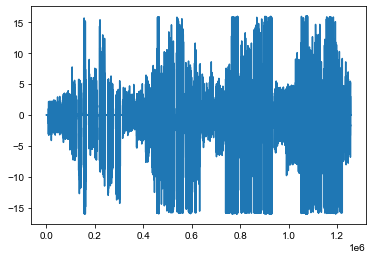

In [9]:
df['acc1_t0'].plot()
sns.set(font_scale = 1)

---
## **<font size="5">4. Normalize data:</font>**
---

In [10]:
X = df.iloc[:,:-1]

In [11]:
scaler_train = StandardScaler()
scaler_train.fit(X)
X_norm = scaler_train.transform(X)

# Save standar scaler for matlab navigation purposes
pickle.dump(scaler_train, open(folder_clf+str(num_window)+'HD_6sig_pca'+str(num_components)+'_scaler.pkl','wb'))

X_norm = pd.DataFrame(X_norm, columns = df.columns[:-1])
X_norm

acc1_t400  acc2_t400  acc3_t400  gyro1_t400  gyro2_t400  gyro3_t400  \
0         0.169655   0.043798   0.130879    0.007286    0.010554    0.043148   
1         0.170298   0.043432   0.131573    0.007114    0.010689    0.043230   
2         0.169627   0.043660   0.131729    0.006716    0.010762    0.043236   
3         0.169302   0.042957   0.132207    0.006585    0.010715    0.042954   
4         0.169760   0.042358   0.132492    0.006631    0.010486    0.042923   
...            ...        ...        ...         ...         ...         ...   
1256714   0.159041   0.055642   0.129649    0.008994    0.004795    0.038831   
1256715   0.165394   0.057687   0.128696    0.008663    0.004704    0.039408   
1256716   0.166747   0.058748   0.129165    0.008799    0.004603    0.039317   
1256717   0.163986   0.058347   0.130502    0.008881    0.004294    0.038747   
1256718   0.164340   0.057200   0.128233    0.008425    0.004321    0.037048   

         acc1_t399  acc2_t399  acc3_t399  gyro1_t399  ...   acc3_t1  gyro1_t1  \
0         0.170298   0.043432   0.131573    0.007114  ...  0.131894  0.004191   
1         0.169627   0.043660   0.131729    0.006716  ...  0.130669  0.004748   
2         0.169302   0.042957   0.132207    0.006585  ...  0.129922  0.005066   
3         0.169760   0.042358   0.132492    0.006631  ...  0.129933  0.005508   
4         0.170489   0.042537   0.132076    0.006625  ...  0.128996  0.006064   
...            ...        ...        ...         ...  ...       ...       ...   
1256714   0.165394   0.057687   0.128696    0.008663  ...  0.136532  0.008185   
1256715   0.166747   0.058748   0.129165    0.008799  ...  0.131900  0.008983   
1256716   0.163986   0.058346   0.130502    0.008881  ...  0.129791  0.008868   
1256717   0.164340   0.057200   0.128233    0.008425  ...  0.126936  0.009348   
1256718   0.163805   0.054557   0.127191    0.008110  ...  0.129941  0.009309   

         gyro2_t1  gyro3_t1   acc1_t0   acc2_t0   acc3_t0  gyro1_t0  gyro2_t0  \
0        0.010836  0.042779  0.170153  0.042423  0.130669  0.004748  0.010729   
1        0.010729  0.042538  0.169384  0.043113  0.129922  0.005066  0.010734   
2        0.010734  0.042156  0.168971  0.043735  0.129933  0.005508  0.010817   
3        0.010817  0.042470  0.169024  0.043950  0.128996  0.006064  0.010897   
4        0.010897  0.042988  0.169632  0.043339  0.130064  0.005910  0.010952   
...           ...       ...       ...       ...       ...       ...       ...   
1256714  0.010409  0.043062  0.162433  0.065458  0.131900  0.008983  0.010037   
1256715  0.010037  0.042372  0.162975  0.068768  0.129791  0.008868  0.009550   
1256716  0.009550  0.041367  0.163559  0.066616  0.126936  0.009348  0.009177   
1256717  0.009177  0.040563  0.158491  0.067477  0.129941  0.009309  0.009532   
1256718  0.009532  0.041205  0.156977  0.067009  0.128558  0.008959  0.009534   

         gyro3_t0  
0        0.042538  
1        0.042156  
2        0.042470  
3        0.042988  
4        0.043271  
...           ...  
1256714  0.042372  
1256715  0.041367  
1256716  0.040563  
1256717  0.041205  
1256718  0.041447  

[1256719 rows x 2406 columns]

---
## **<font size="5">5. Explained Variance vs Components:</font>**
---

### **<font size="4">5.1 Module Linear Acceleration:</font>**

##### **<font size="3">5.1.1 X:</font>**

In [12]:
X_norm.iloc[:,0::6].head(2)

acc1_t400  acc1_t399  acc1_t398  acc1_t397  acc1_t396  acc1_t395  \
0   0.169655   0.170298   0.169627   0.169302   0.169760   0.170489   
1   0.170298   0.169627   0.169302   0.169760   0.170489   0.171279   

   acc1_t394  acc1_t393  acc1_t392  acc1_t391  ...   acc1_t9   acc1_t8  \
0   0.171279   0.171434   0.170786   0.169399  ...  0.169301  0.169278   
1   0.171434   0.170786   0.169399   0.168750  ...  0.169278  0.169023   

    acc1_t7   acc1_t6   acc1_t5   acc1_t4   acc1_t3   acc1_t2   acc1_t1  \
0  0.169023  0.168632  0.168060  0.168367  0.169496  0.170147  0.170668   
1  0.168632  0.168060  0.168367  0.169496  0.170147  0.170668  0.170153   

    acc1_t0  
0  0.170153  
1  0.169384  

[2 rows x 401 columns]

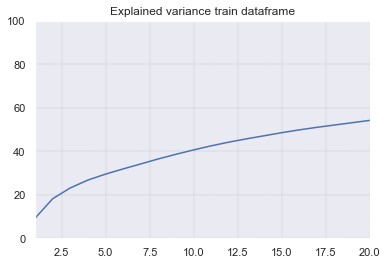

In [13]:
n_components = num_window+1
pca_acc = decomposition.PCA(n_components = n_components).fit(X_norm.iloc[:,0::6])
indx = np.linspace(1,n_components,n_components)
plt.plot(np.linspace(1,n_components,n_components), 100*pca_acc.explained_variance_ratio_.cumsum())
plt.title('Explained variance train dataframe')
plt.xlim([1,20]); plt.ylim([0,100])
plt.grid(color='k', linestyle='--', linewidth=.1)
plt.show()

In [14]:
exp_var_acc = 100*pca_acc.explained_variance_ratio_.cumsum()
exp_var_acc[0:20]

array([ 9.2510389 , 18.21468452, 23.17394873, 26.78753238, 29.5201253 ,
       31.91438681, 34.2260758 , 36.51169064, 38.64626248, 40.65486988,
       42.52939483, 44.23444519, 45.73766152, 47.17810832, 48.57701657,
       49.86244443, 51.04579177, 52.11679652, 53.18455572, 54.23462199])

##### **<font size="3">5.1.2 Y:</font>**

In [15]:
X_norm.iloc[:,1::6].head(2)

acc2_t400  acc2_t399  acc2_t398  acc2_t397  acc2_t396  acc2_t395  \
0   0.043798   0.043432   0.043660   0.042956   0.042358   0.042536   
1   0.043432   0.043660   0.042956   0.042358   0.042537   0.042811   

   acc2_t394  acc2_t393  acc2_t392  acc2_t391  ...   acc2_t9   acc2_t8  \
0   0.042811   0.043530   0.044147   0.044105  ...  0.042057  0.042600   
1   0.043530   0.044147   0.044105   0.044030  ...  0.042600  0.043103   

    acc2_t7   acc2_t6   acc2_t5   acc2_t4   acc2_t3   acc2_t2   acc2_t1  \
0  0.043103  0.043790  0.043619  0.043521  0.043190  0.042323  0.042136   
1  0.043790  0.043619  0.043521  0.043190  0.042323  0.042136  0.042423   

    acc2_t0  
0  0.042423  
1  0.043113  

[2 rows x 401 columns]

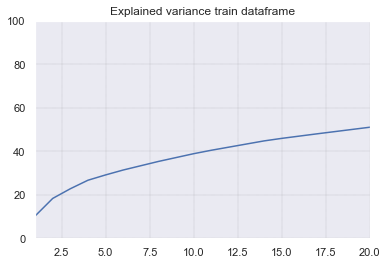

In [16]:
n_components = num_window+1
pca_acc = decomposition.PCA(n_components = n_components).fit(X_norm.iloc[:,1::6])
indx = np.linspace(1,n_components,n_components)
plt.plot(np.linspace(1,n_components,n_components), 100*pca_acc.explained_variance_ratio_.cumsum())
plt.title('Explained variance train dataframe')
plt.xlim([1,20]); plt.ylim([0,100])
plt.grid(color='k', linestyle='--', linewidth=.1)
plt.show()

In [17]:
exp_var_acc = 100*pca_acc.explained_variance_ratio_.cumsum()
exp_var_acc[0:20]

array([10.24262869, 18.33424668, 22.78903886, 26.70457757, 29.14393576,
       31.40315827, 33.3778839 , 35.34761349, 37.13472798, 38.91067753,
       40.49162367, 41.93293985, 43.3742213 , 44.79928469, 45.95877868,
       47.01374473, 48.04592715, 49.06869425, 50.08092677, 51.08457478])

##### **<font size="3">5.1.3 Z:</font>**

In [18]:
X_norm.iloc[:,2::6].head(2)

acc3_t400  acc3_t399  acc3_t398  acc3_t397  acc3_t396  acc3_t395  \
0   0.130879   0.131573   0.131729   0.132207   0.132492   0.132076   
1   0.131573   0.131729   0.132207   0.132492   0.132076   0.132017   

   acc3_t394  acc3_t393  acc3_t392  acc3_t391  ...   acc3_t9   acc3_t8  \
0   0.132017   0.131122   0.130575   0.130198  ...  0.131007  0.132292   
1   0.131122   0.130575   0.130198   0.130228  ...  0.132292  0.132976   

    acc3_t7   acc3_t6   acc3_t5   acc3_t4   acc3_t3   acc3_t2   acc3_t1  \
0  0.132976  0.134177  0.133999  0.132327  0.132063  0.132045  0.131894   
1  0.134177  0.133999  0.132327  0.132063  0.132045  0.131894  0.130669   

    acc3_t0  
0  0.130669  
1  0.129922  

[2 rows x 401 columns]

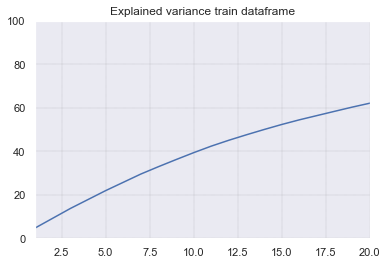

In [19]:
n_components = num_window+1
pca_acc = decomposition.PCA(n_components = n_components).fit(X_norm.iloc[:,2::6])
indx = np.linspace(1,n_components,n_components)
plt.plot(np.linspace(1,n_components,n_components), 100*pca_acc.explained_variance_ratio_.cumsum())
plt.title('Explained variance train dataframe')
plt.xlim([1,20]); plt.ylim([0,100])
plt.grid(color='k', linestyle='--', linewidth=.1)
plt.show()

In [20]:
exp_var_acc = 100*pca_acc.explained_variance_ratio_.cumsum()
exp_var_acc[0:20]

array([ 4.72186678,  9.21857526, 13.70460539, 17.82408748, 21.90816879,
       25.72690027, 29.54493327, 32.9345849 , 36.19931753, 39.3808019 ,
       42.39518454, 45.10437269, 47.62181503, 50.03540229, 52.3485335 ,
       54.48933083, 56.466377  , 58.4022931 , 60.33471073, 62.14214943])

### **<font size="4">5.2 Module Angular Velocity:</font>**

##### **<font size="3">5.2.1 X:</font>**

In [21]:
X_norm.iloc[:,3::6].head(2)

gyro1_t400  gyro1_t399  gyro1_t398  gyro1_t397  gyro1_t396  gyro1_t395  \
0    0.007286    0.007114    0.006716    0.006585    0.006631    0.006625   
1    0.007114    0.006716    0.006585    0.006631    0.006625    0.006639   

   gyro1_t394  gyro1_t393  gyro1_t392  gyro1_t391  ...  gyro1_t9  gyro1_t8  \
0    0.006639    0.006544    0.006413    0.006403  ...  0.004696  0.004399   
1    0.006544    0.006413    0.006403    0.006522  ...  0.004399  0.004329   

   gyro1_t7  gyro1_t6  gyro1_t5  gyro1_t4  gyro1_t3  gyro1_t2  gyro1_t1  \
0  0.004329  0.004588  0.004467  0.004308  0.004287  0.004082  0.004191   
1  0.004588  0.004467  0.004308  0.004287  0.004082  0.004191  0.004748   

   gyro1_t0  
0  0.004748  
1  0.005066  

[2 rows x 401 columns]

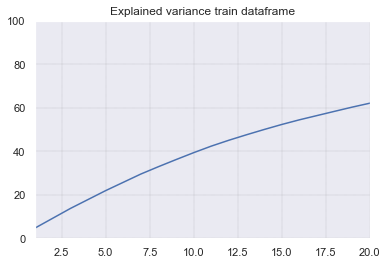

In [22]:
n_components = num_window+1
pca_gyr = decomposition.PCA(n_components = n_components).fit(X_norm.iloc[:,3::6])
indx = np.linspace(1,n_components,n_components)
plt.plot(np.linspace(1,n_components,n_components), 100*pca_acc.explained_variance_ratio_.cumsum())
plt.title('Explained variance train dataframe')
plt.xlim([1,20]); plt.ylim([0,100])
plt.grid(color='k', linestyle='--', linewidth=.1)
plt.show()

In [23]:
exp_var_acc = 100*pca_acc.explained_variance_ratio_.cumsum()
exp_var_acc[0:20]

array([ 4.72186678,  9.21857526, 13.70460539, 17.82408748, 21.90816879,
       25.72690027, 29.54493327, 32.9345849 , 36.19931753, 39.3808019 ,
       42.39518454, 45.10437269, 47.62181503, 50.03540229, 52.3485335 ,
       54.48933083, 56.466377  , 58.4022931 , 60.33471073, 62.14214943])

##### **<font size="3">5.2.2 Y:</font>**

In [24]:
X_norm.iloc[:,4::6].head(2)

gyro2_t400  gyro2_t399  gyro2_t398  gyro2_t397  gyro2_t396  gyro2_t395  \
0    0.010554    0.010689    0.010762    0.010715    0.010486    0.010296   
1    0.010689    0.010762    0.010715    0.010486    0.010296    0.010214   

   gyro2_t394  gyro2_t393  gyro2_t392  gyro2_t391  ...  gyro2_t9  gyro2_t8  \
0    0.010214    0.010172    0.010252    0.010328  ...  0.011298  0.011180   
1    0.010172    0.010252    0.010328    0.010467  ...  0.011180  0.011037   

   gyro2_t7  gyro2_t6  gyro2_t5  gyro2_t4  gyro2_t3  gyro2_t2  gyro2_t1  \
0  0.011037  0.010824  0.010744  0.010913  0.010997  0.010951  0.010836   
1  0.010824  0.010744  0.010913  0.010997  0.010951  0.010836  0.010729   

   gyro2_t0  
0  0.010729  
1  0.010734  

[2 rows x 401 columns]

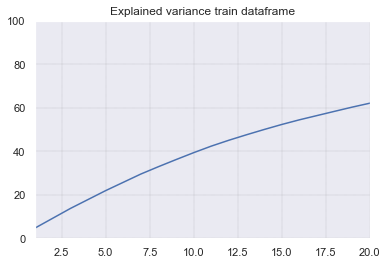

In [25]:
n_components = num_window+1
pca_gyr = decomposition.PCA(n_components = n_components).fit(X_norm.iloc[:,4::6])
indx = np.linspace(1,n_components,n_components)
plt.plot(np.linspace(1,n_components,n_components), 100*pca_acc.explained_variance_ratio_.cumsum())
plt.title('Explained variance train dataframe')
plt.xlim([1,20]); plt.ylim([0,100])
plt.grid(color='k', linestyle='--', linewidth=.1)
plt.show()

In [26]:
exp_var_acc = 100*pca_acc.explained_variance_ratio_.cumsum()
exp_var_acc[0:20]

array([ 4.72186678,  9.21857526, 13.70460539, 17.82408748, 21.90816879,
       25.72690027, 29.54493327, 32.9345849 , 36.19931753, 39.3808019 ,
       42.39518454, 45.10437269, 47.62181503, 50.03540229, 52.3485335 ,
       54.48933083, 56.466377  , 58.4022931 , 60.33471073, 62.14214943])

##### **<font size="3">5.2.3 Z:</font>**

In [27]:
X_norm.iloc[:,5::6].head(2)

gyro3_t400  gyro3_t399  gyro3_t398  gyro3_t397  gyro3_t396  gyro3_t395  \
0    0.043148    0.043230    0.043236    0.042954    0.042923    0.042935   
1    0.043230    0.043236    0.042954    0.042923    0.042935    0.042894   

   gyro3_t394  gyro3_t393  gyro3_t392  gyro3_t391  ...  gyro3_t9  gyro3_t8  \
0    0.042894    0.043277    0.043651    0.043718  ...  0.043038  0.043401   
1    0.043277    0.043651    0.043718    0.043744  ...  0.043401  0.043695   

   gyro3_t7  gyro3_t6  gyro3_t5  gyro3_t4  gyro3_t3  gyro3_t2  gyro3_t1  \
0  0.043695  0.043730  0.043497  0.043174  0.043123  0.042850  0.042779   
1  0.043730  0.043497  0.043174  0.043123  0.042850  0.042779  0.042538   

   gyro3_t0  
0  0.042538  
1  0.042156  

[2 rows x 401 columns]

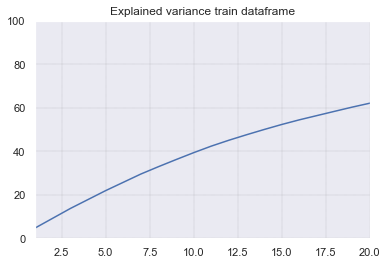

In [28]:
n_components = num_window+1
pca_gyr = decomposition.PCA(n_components = n_components).fit(X_norm.iloc[:,5::6])
indx = np.linspace(1,n_components,n_components)
plt.plot(np.linspace(1,n_components,n_components), 100*pca_acc.explained_variance_ratio_.cumsum())
plt.title('Explained variance train dataframe')
plt.xlim([1,20]); plt.ylim([0,100])
plt.grid(color='k', linestyle='--', linewidth=.1)
plt.show()

In [29]:
exp_var_acc = 100*pca_acc.explained_variance_ratio_.cumsum()
exp_var_acc[0:20]

array([ 4.72186678,  9.21857526, 13.70460539, 17.82408748, 21.90816879,
       25.72690027, 29.54493327, 32.9345849 , 36.19931753, 39.3808019 ,
       42.39518454, 45.10437269, 47.62181503, 50.03540229, 52.3485335 ,
       54.48933083, 56.466377  , 58.4022931 , 60.33471073, 62.14214943])

---
## **<font size="5">6. PCA:</font>**
---

In [30]:
pca_acc_x = decomposition.PCA(n_components = num_components).fit(X_norm.iloc[:,0::6])
pca_acc_y = decomposition.PCA(n_components = num_components).fit(X_norm.iloc[:,1::6])
pca_acc_z = decomposition.PCA(n_components = num_components).fit(X_norm.iloc[:,2::6])
pca_gyr_x = decomposition.PCA(n_components = num_components).fit(X_norm.iloc[:,3::6])
pca_gyr_y = decomposition.PCA(n_components = num_components).fit(X_norm.iloc[:,4::6])
pca_gyr_z = decomposition.PCA(n_components = num_components).fit(X_norm.iloc[:,5::6])

In [31]:
# Project data to its dimensional reduction space
X_projected_acc_x = pca_acc_x.transform(X_norm.iloc[:,0::6])
print('The shape of the Linear Acceleration X projected training data is:' + str(X_projected_acc_x.shape))
X_projected_acc_y = pca_acc_y.transform(X_norm.iloc[:,1::6])
print('The shape of the Linear Acceleration Y projected training data is:' + str(X_projected_acc_y.shape))
X_projected_acc_z = pca_acc_z.transform(X_norm.iloc[:,2::6])
print('The shape of the Linear Acceleration Z projected training data is:' + str(X_projected_acc_z.shape))

X_projected_gyr_x = pca_gyr_x.transform(X_norm.iloc[:,3::6])
print('The shape of the Angular Velocity X projected training data is:' + str(X_projected_gyr_x.shape))
X_projected_gyr_y = pca_gyr_y.transform(X_norm.iloc[:,4::6])
print('The shape of the Angular Velocity Y projected training data is:' + str(X_projected_gyr_y.shape))
X_projected_gyr_z = pca_gyr_z.transform(X_norm.iloc[:,5::6])
print('The shape of the Angular Velocity Z projected training data is:' + str(X_projected_gyr_z.shape))

# Save pca models for matlab navigation purposes:
pickle.dump(pca_acc_x, open(folder_clf + str(num_window)+'HD_6sig_pca'+str(num_components)+'_PCA_acc_x.pkl','wb'))
pickle.dump(pca_acc_y, open(folder_clf + str(num_window)+'HD_6sig_pca'+str(num_components)+'_PCA_acc_y.pkl','wb'))
pickle.dump(pca_acc_z, open(folder_clf + str(num_window)+'HD_6sig_pca'+str(num_components)+'_PCA_acc_z.pkl','wb'))
pickle.dump(pca_gyr_x, open(folder_clf + str(num_window)+'HD_6sig_pca'+str(num_components)+'_PCA_gyr_x.pkl','wb'))
pickle.dump(pca_gyr_y, open(folder_clf + str(num_window)+'HD_6sig_pca'+str(num_components)+'_PCA_gyr_y.pkl','wb'))
pickle.dump(pca_gyr_z, open(folder_clf + str(num_window)+'HD_6sig_pca'+str(num_components)+'_PCA_gyr_z.pkl','wb'))

# Name of the columns of the pca dataset
colnames = []
for i in range(1,6*num_components+1):
    colnames = np.concatenate((colnames, [f'comp_{i}']))
colnames

X_projected = pd.concat([pd.DataFrame(X_projected_acc_x),pd.DataFrame(X_projected_acc_y),pd.DataFrame(X_projected_acc_z), pd.DataFrame(X_projected_gyr_x), pd.DataFrame(X_projected_gyr_y), pd.DataFrame(X_projected_gyr_z)], axis = 1)
X_projected.columns = colnames

The shape of the Linear Acceleration X projected training data is:(1256719, 6)
The shape of the Linear Acceleration Y projected training data is:(1256719, 6)
The shape of the Linear Acceleration Z projected training data is:(1256719, 6)
The shape of the Angular Velocity X projected training data is:(1256719, 6)
The shape of the Angular Velocity Y projected training data is:(1256719, 6)
The shape of the Angular Velocity Z projected training data is:(1256719, 6)


In [32]:
X_projected['label'] = df['label']
print('The projected test data in the number of components is:')
X_projected

The projected test data in the number of components is:


comp_1    comp_2    comp_3    comp_4    comp_5    comp_6    comp_7  \
0       -3.042310  0.000330 -1.426206 -0.002546 -0.430885  0.002957  0.006246   
1       -3.042305  0.000348 -1.426159 -0.002619 -0.430920  0.003102  0.006329   
2       -3.042298  0.000358 -1.426060 -0.002680 -0.430909  0.003247  0.006404   
3       -3.042292  0.000395 -1.425993 -0.002773 -0.430929  0.003364  0.006464   
4       -3.042288  0.000419 -1.425967 -0.002848 -0.430989  0.003487  0.006563   
...           ...       ...       ...       ...       ...       ...       ...   
1256714 -2.891908 -0.001833 -1.365684 -0.033236 -0.420604  0.011935 -0.095494   
1256715 -2.891927 -0.001881 -1.365477 -0.033317 -0.421720  0.011856 -0.096106   
1256716 -2.891932 -0.002233 -1.364991 -0.033017 -0.422564  0.011998 -0.096708   
1256717 -2.891921 -0.002415 -1.364202 -0.032907 -0.423115  0.011971 -0.097357   
1256718 -2.891914 -0.002398 -1.363463 -0.033025 -0.423696  0.011745 -0.097969   

           comp_8    comp_9   comp_10  ...   comp_28   comp_29   comp_30  \
0        0.230323 -0.000185 -0.240362  ... -0.000291 -0.088374 -0.002774   
1        0.230266 -0.000140 -0.240367  ... -0.000320 -0.088418 -0.002765   
2        0.230159 -0.000105 -0.240323  ... -0.000361 -0.088458 -0.002765   
3        0.230050 -0.000088 -0.240275  ... -0.000410 -0.088498 -0.002769   
4        0.229935 -0.000022 -0.240220  ... -0.000459 -0.088543 -0.002768   
...           ...       ...       ...  ...       ...       ...       ...   
1256714  0.261082 -0.036979 -0.354132  ... -0.008739 -0.092211 -0.007819   
1256715  0.261641 -0.036051 -0.355022  ... -0.009992 -0.092176 -0.007486   
1256716  0.262415 -0.035107 -0.356072  ... -0.011216 -0.092095 -0.007116   
1256717  0.263209 -0.034216 -0.357101  ... -0.012451 -0.092007 -0.006754   
1256718  0.264014 -0.033272 -0.358100  ... -0.013665 -0.091905 -0.006368   

          comp_31   comp_32   comp_33   comp_34   comp_35   comp_36  label  
0        0.074573 -0.000346  0.000169  0.322486 -0.706668 -0.000510   ZUPT  
1        0.074555 -0.000372  0.000121  0.322558 -0.706665 -0.000457   ZUPT  
2        0.074539 -0.000386  0.000089  0.322612 -0.706665 -0.000430   ZUPT  
3        0.074528 -0.000383  0.000080  0.322629 -0.706671 -0.000439   ZUPT  
4        0.074523 -0.000379  0.000072  0.322606 -0.706683 -0.000447   ZUPT  
...           ...       ...       ...       ...       ...       ...    ...  
1256714  0.059893 -0.007167  0.016067  0.299798 -0.655566 -0.008790   ZUPT  
1256715  0.059820 -0.006945  0.016113  0.299798 -0.655812 -0.009002   ZUPT  
1256716  0.059737 -0.006728  0.016148  0.299901 -0.656044 -0.009187   ZUPT  
1256717  0.059668 -0.006493  0.016207  0.299954 -0.656290 -0.009402   ZUPT  
1256718  0.059612 -0.006267  0.016251  0.299951 -0.656550 -0.009583   ZUPT  

[1256719 rows x 37 columns]

---
## **<font size="5">7. Balance the Imbalanced Dataset</font>**
---

In [33]:
X_projected['label'].value_counts()

ZUPT                239862
walk_b_60           143038
walk_60             117131
walk_b_90            98281
walk_90              85657
ZUPT_walk_60         76683
slide_left           75966
slide_right          72957
ZUPT_walk_b_60       71662
jogg_120             62547
run_150              47066
ZUPT_walk_90         44115
sprint_180           39507
ZUPT_walk_b_90       22522
ZUPT_slide_right     18487
ZUPT_slide_left      16463
ZUPT_jogg_120        14508
ZUPT_run_150          6979
ZUPT_sprint_180       3288
Name: label, dtype: int64

Text(0.5, 1.0, '% of apperances each class on the dataset:')

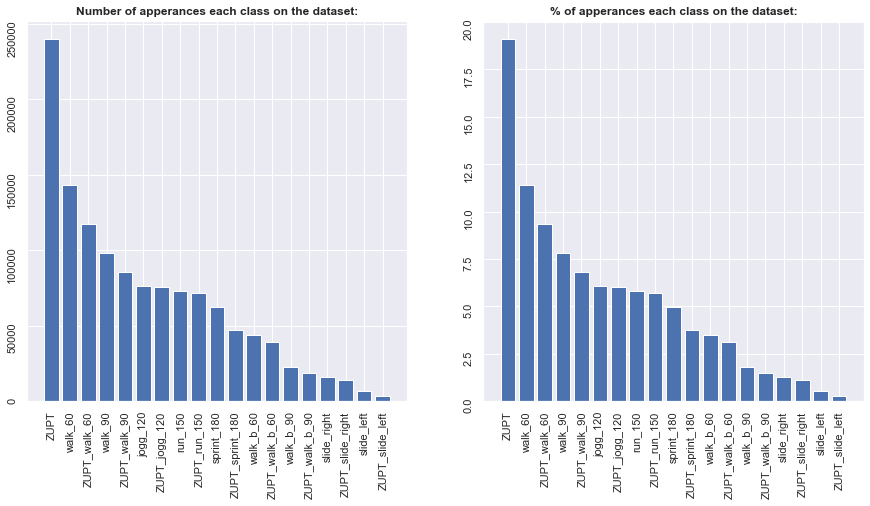

In [34]:
fig = plt.figure(figsize=(15, 7))
gs = GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.bar(X_projected['label'].unique(), X_projected['label'].value_counts()); 
ax0.tick_params(labelrotation=90)
ax0.set_title('Number of apperances each class on the dataset:', fontweight="bold")
ax1.bar(X_projected['label'].unique(), X_projected['label'].value_counts()/np.size(X_projected,0)*100); 
ax1.tick_params(labelrotation=90)
ax1.set_title('% of apperances each class on the dataset:', fontweight="bold")

In [35]:
# transform the dataset
X = X_projected.iloc[:,:-1]
y = X_projected['label']

y = y.replace(['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
               'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
               'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
               'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
               'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
               [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])


In [36]:
#strategy = {0:3000, 1:3000, 2:3000, 3:3000, 4:3000, 5:3000, 6:3000, 7:3000, 8:3000, 9:3000, 10:3000, 11:3000, 12:3000, 13:3000, 14:3000, 15:3000, 16:3000, 17:3000, 18:3000}
strategy = {0:12000, 1:12000, 2:12000, 3:12000, 4:12000, 5:12000, 6:12000, 7:12000, 8:12000, 9:12000, 10:12000, 11:12000, 12:12000, 13:12000, 14:12000, 15:12000, 16:12000, 17:12000, 18:12000}
#strategy = {0:20000, 1:20000, 2:20000, 3:20000, 4:20000, 5:20000, 6:20000, 7:20000, 8:20000, 9:20000, 10:20000, 11:20000, 12:20000, 13:20000, 14:20000, 15:20000, 16:20000, 17:20000, 18:20000}

# transform the dataset
over = SMOTE()
under = RandomUnderSampler(sampling_strategy=strategy)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X,y = pipeline.fit_resample(X, y)

In [37]:
df_balanced = pd.concat([X,pd.DataFrame(y,columns=['label'])], axis = 1)
df_balanced['label'] = df_balanced['label'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
                                                    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
                                                    'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
                                                    'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
                                                    'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
                                                    'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left']).to_numpy()
df_balanced['label'].value_counts()

ZUPT                12000
walk_60             12000
slide_right         12000
walk_b_90           12000
walk_b_60           12000
sprint_180          12000
run_150             12000
jogg_120            12000
walk_90             12000
ZUPT_slide_left     12000
ZUPT_walk_60        12000
ZUPT_slide_right    12000
ZUPT_walk_b_90      12000
ZUPT_walk_b_60      12000
ZUPT_sprint_180     12000
ZUPT_run_150        12000
ZUPT_jogg_120       12000
ZUPT_walk_90        12000
slide_left          12000
Name: label, dtype: int64

In [38]:
df_balanced.head(2)

comp_1    comp_2    comp_3    comp_4    comp_5    comp_6    comp_7  \
0 -2.973461 -0.004730 -1.395954 -0.000138 -0.425527 -0.002727  0.007101   
1 -2.981218  0.001255 -1.392340  0.013909 -0.423192 -0.003733 -0.004502   

     comp_8    comp_9   comp_10  ...   comp_28   comp_29   comp_30   comp_31  \
0  0.236271 -0.002450 -0.251828  ... -0.001712 -0.097192 -0.000456  0.072095   
1  0.280883 -0.008788 -0.293953  ...  0.001797 -0.086168 -0.001844  0.071968   

    comp_32   comp_33   comp_34   comp_35   comp_36  label  
0 -0.000184  0.002472  0.310004 -0.677764 -0.001884   ZUPT  
1  0.000363  0.002794  0.300764 -0.653999 -0.001407   ZUPT  

[2 rows x 37 columns]

---
## **<font size="5">7. Train Model:</font>**
---

In [39]:
# X = X_projected.iloc[:,:-1]
# y = X_projected.iloc[:,-1].replace(['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
#                                     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
#                                     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
#                                     'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
#                                     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
#                                     [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
# y

In [40]:
X = df_balanced.iloc[:,:-1]
y = df_balanced.iloc[:,-1].replace(['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
                                    'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
                                    'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
                                    'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
                                    'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
                                    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
y

0          0
1          0
2          0
3          0
4          0
          ..
227995    18
227996    18
227997    18
227998    18
227999    18
Name: label, Length: 228000, dtype: int64

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [42]:
if training_mode == 0:
    print('Training...')
    support = svm.SVC(kernel = svm_kernel, C = svm_C)
    support.fit(x_train, y_train)
    print('Training done!')

    pickle.dump(support, open(folder_clf + name_clf, 'wb'))     # save the clf model
    print('Model saved!')

elif training_mode == 1:
    print('Retraining the classifier with more data...')
    support = pickle.load(open(folder_clf + name_clf2, 'rb'))    # read clf model
    support.fit(x_train, y_train)
    print('Retraining done!')

    pickle.dump(support, open(folder_clf + name_clf, 'wb'))     # save the clf model
    print('Model saved!')

else:
    support = pickle.load(open(folder_clf + name_clf, 'rb'))    # read clf model
    print('Classifier Loaded!')

print('Classifier Gamma: ' + str(support._gamma))

Training...
Training done!
Model saved!
Classifier Gamma: 0.00046836345070760336


---
## **<font size="5">8. Prediction Test:</font>**
---

In [43]:
Y_predict = support.predict(x_test)

In [44]:
r2score_svm = 100*r2_score(y_test, Y_predict)
print('The r2score of the SVM is: {} %'.format(r2score_svm))

acc_svm = 100*accuracy_score(y_test, Y_predict)
print('The accuracy of the SVM is: {} %'.format(acc_svm))

The r2score of the SVM is: 83.97612941255933 %
The accuracy of the SVM is: 94.0109649122807 %


In [45]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83      2405
           1       0.86      0.93      0.89      2354
           2       0.94      0.94      0.94      2327
           3       0.98      1.00      0.99      2347
           4       1.00      1.00      1.00      2424
           5       1.00      1.00      1.00      2401
           6       0.78      0.87      0.82      2413
           7       0.94      0.95      0.94      2484
           8       0.98      1.00      0.99      2451
           9       0.99      1.00      0.99      2344
          10       0.93      0.93      0.93      2411
          11       0.97      0.91      0.94      2445
          12       1.00      0.93      0.96      2438
          13       0.99      0.93      0.96      2356
          14       0.99      0.83      0.90      2428
          15       0.95      0.91      0.93      2353
          16       0.99      0.85      0.92      2413
          17       0.99    

In [46]:
y_test

79344      6
73067      6
95059      7
49525      4
4271       0
          ..
78219      6
125475    10
214470    17
219230    18
213406    17
Name: label, Length: 45600, dtype: int64

In [47]:
Y_predict

array([ 6,  6,  7, ..., 17,  9, 17], dtype=int64)

In [48]:
X_test = pd.concat([x_test.reset_index().drop('index', axis = 1), y_test.reset_index().drop('index', axis = 1), pd.DataFrame(Y_predict)], axis = 1)

X_test.columns = [*colnames, 'true_l','predicted_l']

print('X test with true and predicted label:')
X_test

X test with true and predicted label:


comp_1     comp_2    comp_3    comp_4    comp_5    comp_6  \
0      -3.195466  -0.328722 -1.378552 -0.035443 -0.502279  0.018222   
1      -4.565749   2.167898 -2.918220 -0.012357  0.005510  0.939167   
2      -5.169516   6.174041 -7.539072 -2.965262 -1.130690  2.039485   
3      17.025554 -17.258338  4.168460 -9.528133 -2.900409  3.110859   
4      -2.841469  -0.002182 -1.322786  0.000723 -0.405860 -0.001783   
...          ...        ...       ...       ...       ...       ...   
45595  -2.775441   0.011634 -1.260842  0.014590 -0.394077 -0.005394   
45596   3.031144   4.213486  0.435443 -2.391207  0.372804 -0.572870   
45597   4.282494  -2.033676 -4.565676 -6.445725  6.413280  2.245178   
45598  -2.274796   0.397823 -1.930298  1.566357  2.452134  2.210644   
45599   2.106998   2.126577  6.929410  7.007438 -0.660708  9.963979   

          comp_7     comp_8     comp_9   comp_10  ...   comp_29   comp_30  \
0       0.322944   0.112906   0.184927 -0.203016  ... -0.269336 -0.075421   
1      -0.719745   1.532793  -1.693000 -0.358092  ... -1.065042 -1.342685   
2      -0.007229   0.472912  -0.325373 -0.243943  ... -9.476108  2.722305   
3      -4.084035  -1.813443   0.558899  2.030281  ... -4.992929 -8.020572   
4      -0.006298   0.360275  -0.002134 -0.381740  ... -0.090113 -0.001016   
...          ...        ...        ...       ...  ...       ...       ...   
45595   0.010596   0.210940   0.101806 -0.197802  ... -0.054401  0.003040   
45596  -0.245131  -0.825051   3.197343 -0.884852  ... -6.474924  1.750072   
45597  10.899140  19.400316   3.508085 -0.376901  ... -2.508197 -1.208184   
45598  -0.340732   0.868453  -0.656403  1.535482  ...  0.635117  1.111083   
45599 -21.331650   5.977236 -11.350814 -5.744608  ... -1.749738  1.775062   

         comp_31    comp_32    comp_33    comp_34    comp_35   comp_36  \
0       0.153205  -0.087084   0.016865   0.307640  -0.811330 -0.015895   
1       3.750745  -3.378267  -6.129206  -3.747623  -5.536841  2.536260   
2       0.308864  -2.496319  -1.004342  -2.726638  -1.906281  2.290662   
3       2.748591  -2.763172  -6.198181  -3.130542  -7.201832  2.466566   
4       0.073315   0.001058  -0.001817   0.309690  -0.678960 -0.002274   
...          ...        ...        ...        ...        ...       ...   
45595  -0.041002   0.041115   0.159672   0.427550  -0.676899 -0.007282   
45596   3.464970   0.196900   3.631578   4.178272   1.958257  1.063073   
45597  28.361328 -10.023629  17.176714  -6.462833   0.053302 -6.909951   
45598   1.573126   2.108529   9.908449  -1.845566   3.361622 -7.989058   
45599 -12.180190  11.220475 -17.929052 -19.693766  10.152954 -2.759195   

       true_l  predicted_l  
0           6            6  
1           6            6  
2           7            7  
3           4            4  
4           0            0  
...       ...          ...  
45595       6            0  
45596      10           10  
45597      17           17  
45598      18            9  
45599      17           17  

[45600 rows x 38 columns]

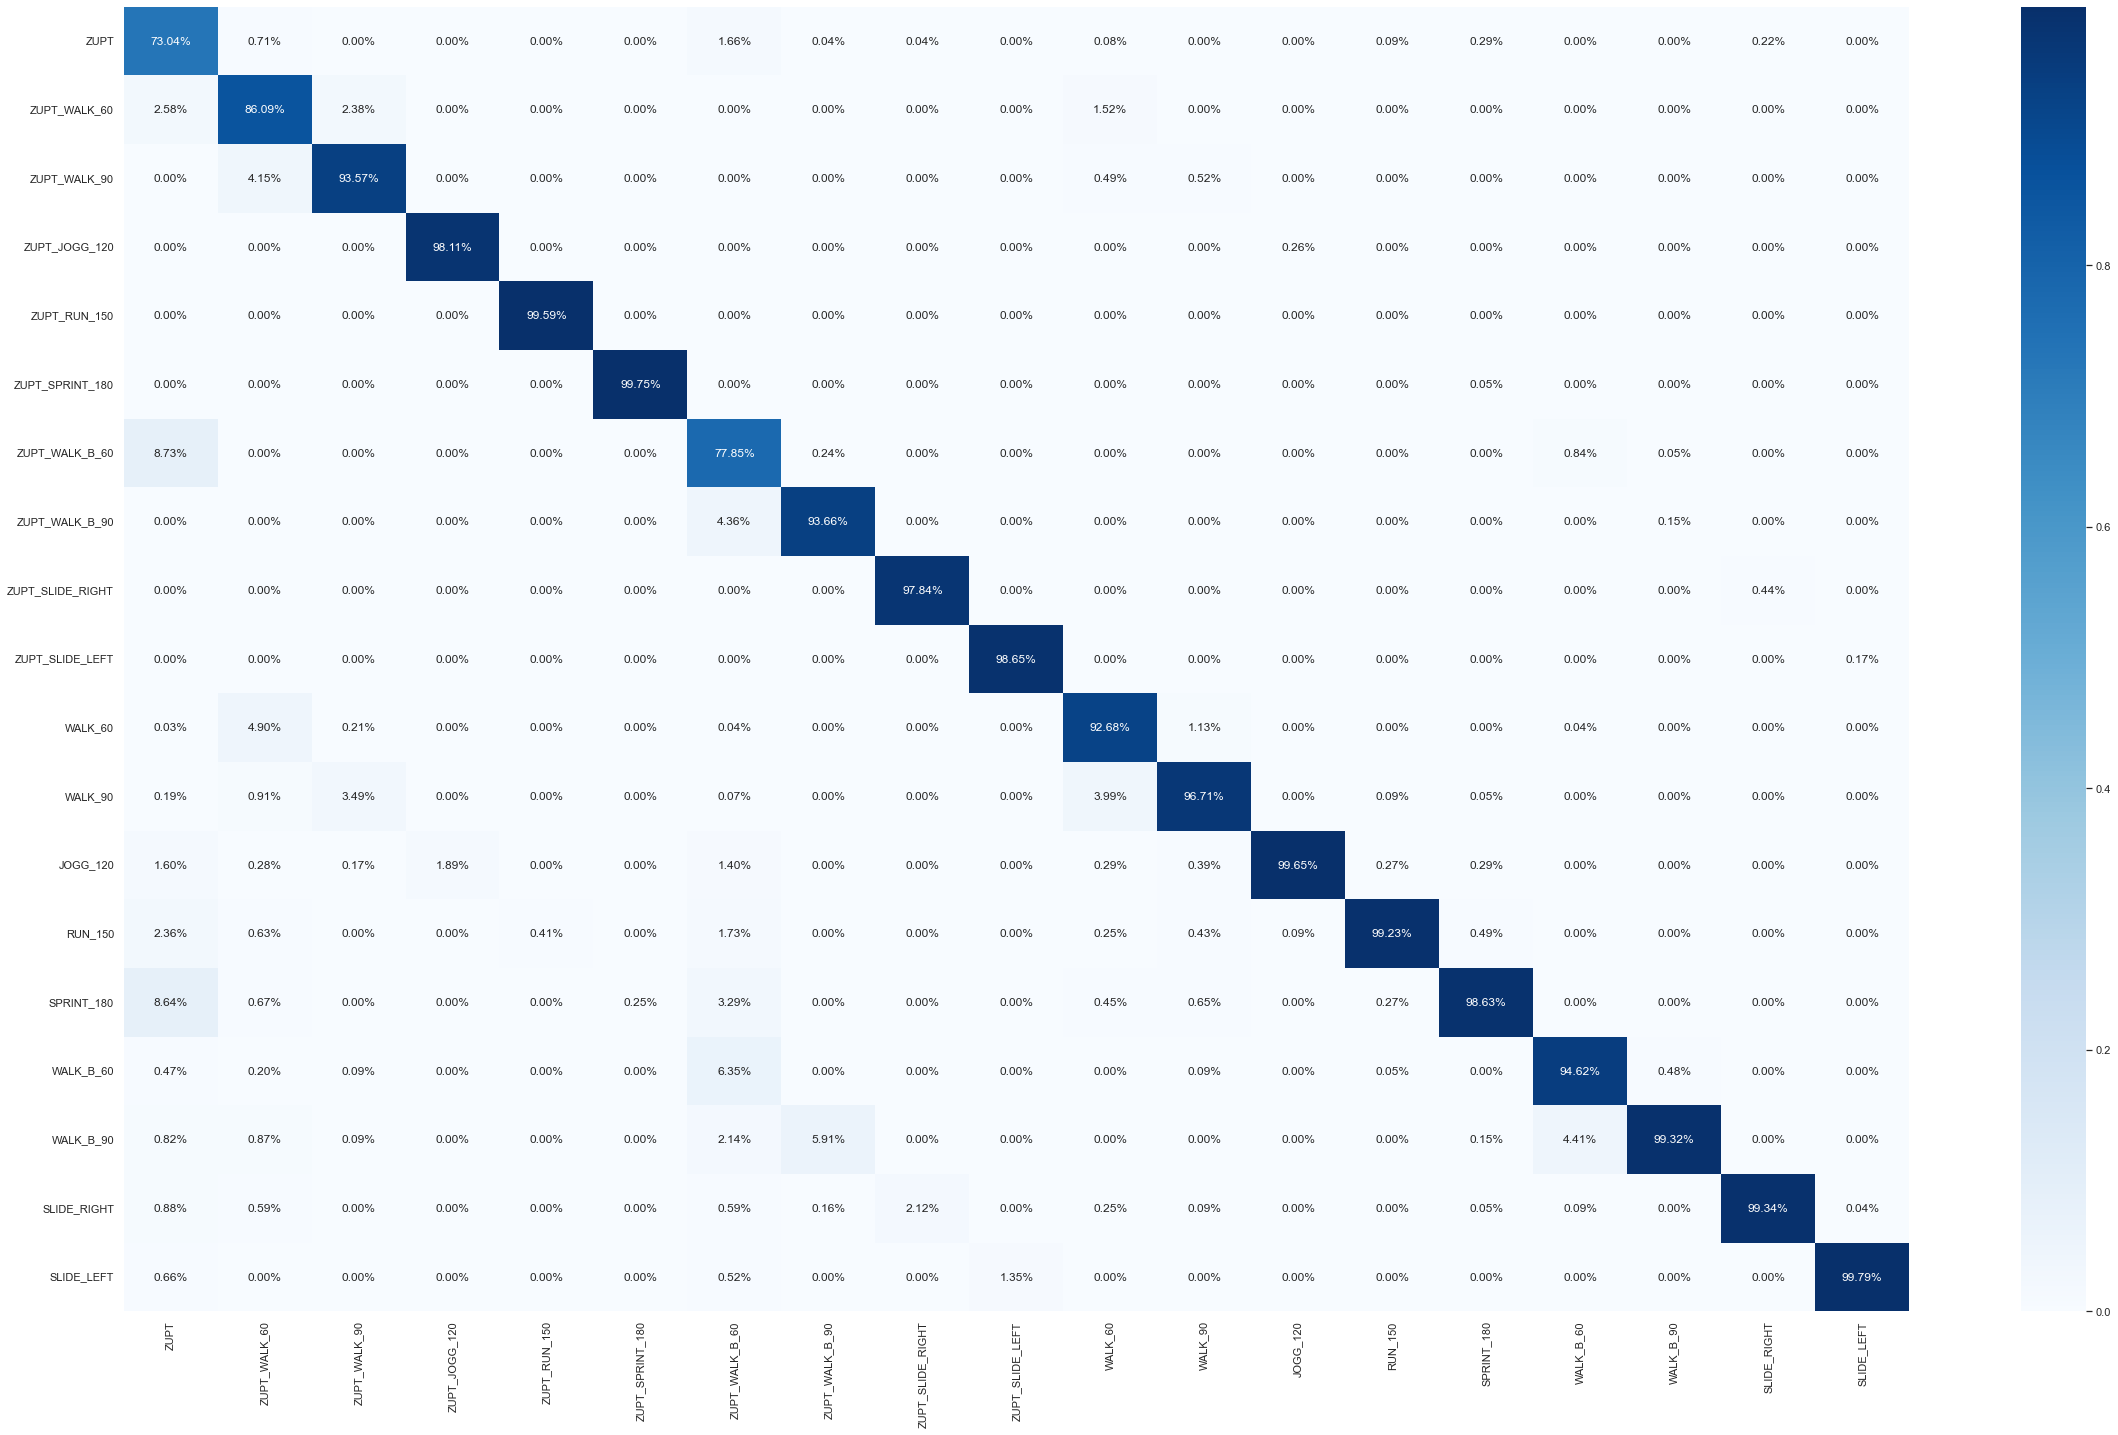

In [49]:
X_test.loc[:,"true_l"] = X_test.loc[:,"true_l"].replace(
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

X_test.loc[:,"predicted_l"] = X_test.loc[:,"predicted_l"].replace(
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

labels = ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
          'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
          'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
          'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
          'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left']

CM_SVM = confusion_matrix(X_test.loc[:,"true_l"], X_test.loc[:,"predicted_l"], labels=labels)

CM_SVM = pd.DataFrame(CM_SVM, index=labels)

sns.set(rc = {'figure.figsize':(40,24)})
axis_labels = ['ZUPT','ZUPT_WALK_60','ZUPT_WALK_90','ZUPT_JOGG_120','ZUPT_RUN_150','ZUPT_SPRINT_180',
               'ZUPT_WALK_B_60','ZUPT_WALK_B_90','ZUPT_SLIDE_RIGHT','ZUPT_SLIDE_LEFT',
               'WALK_60','WALK_90','JOGG_120','RUN_150','SPRINT_180','WALK_B_60',
               'WALK_B_90','SLIDE_RIGHT','SLIDE_LEFT']

sns.heatmap(CM_SVM/np.sum(CM_SVM),annot=True, fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.show()

---
## **<font size="5">8. Visualization test data HD dataset data using t-sne:</font>**
---

In [50]:
X_test

comp_1     comp_2    comp_3    comp_4    comp_5    comp_6  \
0      -3.195466  -0.328722 -1.378552 -0.035443 -0.502279  0.018222   
1      -4.565749   2.167898 -2.918220 -0.012357  0.005510  0.939167   
2      -5.169516   6.174041 -7.539072 -2.965262 -1.130690  2.039485   
3      17.025554 -17.258338  4.168460 -9.528133 -2.900409  3.110859   
4      -2.841469  -0.002182 -1.322786  0.000723 -0.405860 -0.001783   
...          ...        ...       ...       ...       ...       ...   
45595  -2.775441   0.011634 -1.260842  0.014590 -0.394077 -0.005394   
45596   3.031144   4.213486  0.435443 -2.391207  0.372804 -0.572870   
45597   4.282494  -2.033676 -4.565676 -6.445725  6.413280  2.245178   
45598  -2.274796   0.397823 -1.930298  1.566357  2.452134  2.210644   
45599   2.106998   2.126577  6.929410  7.007438 -0.660708  9.963979   

          comp_7     comp_8     comp_9   comp_10  ...   comp_29   comp_30  \
0       0.322944   0.112906   0.184927 -0.203016  ... -0.269336 -0.075421   
1      -0.719745   1.532793  -1.693000 -0.358092  ... -1.065042 -1.342685   
2      -0.007229   0.472912  -0.325373 -0.243943  ... -9.476108  2.722305   
3      -4.084035  -1.813443   0.558899  2.030281  ... -4.992929 -8.020572   
4      -0.006298   0.360275  -0.002134 -0.381740  ... -0.090113 -0.001016   
...          ...        ...        ...       ...  ...       ...       ...   
45595   0.010596   0.210940   0.101806 -0.197802  ... -0.054401  0.003040   
45596  -0.245131  -0.825051   3.197343 -0.884852  ... -6.474924  1.750072   
45597  10.899140  19.400316   3.508085 -0.376901  ... -2.508197 -1.208184   
45598  -0.340732   0.868453  -0.656403  1.535482  ...  0.635117  1.111083   
45599 -21.331650   5.977236 -11.350814 -5.744608  ... -1.749738  1.775062   

         comp_31    comp_32    comp_33    comp_34    comp_35   comp_36  \
0       0.153205  -0.087084   0.016865   0.307640  -0.811330 -0.015895   
1       3.750745  -3.378267  -6.129206  -3.747623  -5.536841  2.536260   
2       0.308864  -2.496319  -1.004342  -2.726638  -1.906281  2.290662   
3       2.748591  -2.763172  -6.198181  -3.130542  -7.201832  2.466566   
4       0.073315   0.001058  -0.001817   0.309690  -0.678960 -0.002274   
...          ...        ...        ...        ...        ...       ...   
45595  -0.041002   0.041115   0.159672   0.427550  -0.676899 -0.007282   
45596   3.464970   0.196900   3.631578   4.178272   1.958257  1.063073   
45597  28.361328 -10.023629  17.176714  -6.462833   0.053302 -6.909951   
45598   1.573126   2.108529   9.908449  -1.845566   3.361622 -7.989058   
45599 -12.180190  11.220475 -17.929052 -19.693766  10.152954 -2.759195   

               true_l      predicted_l  
0      ZUPT_walk_b_60   ZUPT_walk_b_60  
1      ZUPT_walk_b_60   ZUPT_walk_b_60  
2      ZUPT_walk_b_90   ZUPT_walk_b_90  
3        ZUPT_run_150     ZUPT_run_150  
4                ZUPT             ZUPT  
...               ...              ...  
45595  ZUPT_walk_b_60             ZUPT  
45596         walk_60          walk_60  
45597     slide_right      slide_right  
45598      slide_left  ZUPT_slide_left  
45599     slide_right      slide_right  

[45600 rows x 38 columns]

In [51]:
X_test_act = pd.DataFrame()
X_test_act = X_test
X_test_act.loc[:,"true_l"] = X_test.loc[:,"true_l"].replace(
    ['ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left'],
    ['walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

X_test_act.loc[:,"predicted_l"] = X_test.loc[:,"predicted_l"].replace(
    ['ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left'],
    ['walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

X_test_act

comp_1     comp_2    comp_3    comp_4    comp_5    comp_6  \
0      -3.195466  -0.328722 -1.378552 -0.035443 -0.502279  0.018222   
1      -4.565749   2.167898 -2.918220 -0.012357  0.005510  0.939167   
2      -5.169516   6.174041 -7.539072 -2.965262 -1.130690  2.039485   
3      17.025554 -17.258338  4.168460 -9.528133 -2.900409  3.110859   
4      -2.841469  -0.002182 -1.322786  0.000723 -0.405860 -0.001783   
...          ...        ...       ...       ...       ...       ...   
45595  -2.775441   0.011634 -1.260842  0.014590 -0.394077 -0.005394   
45596   3.031144   4.213486  0.435443 -2.391207  0.372804 -0.572870   
45597   4.282494  -2.033676 -4.565676 -6.445725  6.413280  2.245178   
45598  -2.274796   0.397823 -1.930298  1.566357  2.452134  2.210644   
45599   2.106998   2.126577  6.929410  7.007438 -0.660708  9.963979   

          comp_7     comp_8     comp_9   comp_10  ...   comp_29   comp_30  \
0       0.322944   0.112906   0.184927 -0.203016  ... -0.269336 -0.075421   
1      -0.719745   1.532793  -1.693000 -0.358092  ... -1.065042 -1.342685   
2      -0.007229   0.472912  -0.325373 -0.243943  ... -9.476108  2.722305   
3      -4.084035  -1.813443   0.558899  2.030281  ... -4.992929 -8.020572   
4      -0.006298   0.360275  -0.002134 -0.381740  ... -0.090113 -0.001016   
...          ...        ...        ...       ...  ...       ...       ...   
45595   0.010596   0.210940   0.101806 -0.197802  ... -0.054401  0.003040   
45596  -0.245131  -0.825051   3.197343 -0.884852  ... -6.474924  1.750072   
45597  10.899140  19.400316   3.508085 -0.376901  ... -2.508197 -1.208184   
45598  -0.340732   0.868453  -0.656403  1.535482  ...  0.635117  1.111083   
45599 -21.331650   5.977236 -11.350814 -5.744608  ... -1.749738  1.775062   

         comp_31    comp_32    comp_33    comp_34    comp_35   comp_36  \
0       0.153205  -0.087084   0.016865   0.307640  -0.811330 -0.015895   
1       3.750745  -3.378267  -6.129206  -3.747623  -5.536841  2.536260   
2       0.308864  -2.496319  -1.004342  -2.726638  -1.906281  2.290662   
3       2.748591  -2.763172  -6.198181  -3.130542  -7.201832  2.466566   
4       0.073315   0.001058  -0.001817   0.309690  -0.678960 -0.002274   
...          ...        ...        ...        ...        ...       ...   
45595  -0.041002   0.041115   0.159672   0.427550  -0.676899 -0.007282   
45596   3.464970   0.196900   3.631578   4.178272   1.958257  1.063073   
45597  28.361328 -10.023629  17.176714  -6.462833   0.053302 -6.909951   
45598   1.573126   2.108529   9.908449  -1.845566   3.361622 -7.989058   
45599 -12.180190  11.220475 -17.929052 -19.693766  10.152954 -2.759195   

            true_l  predicted_l  
0        walk_b_60    walk_b_60  
1        walk_b_60    walk_b_60  
2        walk_b_90    walk_b_90  
3          run_150      run_150  
4             ZUPT         ZUPT  
...            ...          ...  
45595    walk_b_60         ZUPT  
45596      walk_60      walk_60  
45597  slide_right  slide_right  
45598   slide_left   slide_left  
45599  slide_right  slide_right  

[45600 rows x 38 columns]

In [61]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne_acc = TSNE(n_components=2, verbose=1, random_state=123)
z_acc = tsne_acc.fit_transform(X_test_act.iloc[:,:num_components*3])

c:\Users\Eudald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Eudald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 45600 samples in 0.002s...
[t-SNE] Computed neighbors for 45600 samples in 0.608s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45600
[t-SNE] Computed conditional probabilities for sample 2000 / 45600
[t-SNE] Computed conditional probabilities for sample 3000 / 45600
[t-SNE] Computed conditional probabilities for sample 4000 / 45600
[t-SNE] Computed conditional probabilities for sample 5000 / 45600
[t-SNE] Computed conditional probabilities for sample 6000 / 45600
[t-SNE] Computed conditional probabilities for sample 7000 / 45600
[t-SNE] Computed conditional probabilities for sample 8000 / 45600
[t-SNE] Computed conditional probabilities for sample 9000 / 45600
[t-SNE] Computed conditional probabilities for sample 10000 / 45600
[t-SNE] Computed conditional probabilities for sample 11000 / 45600
[t-SNE] Computed conditional probabilities for sample 12000 / 45600
[t-SNE] Computed conditional probabilities for sam

In [62]:
tsne_gyr = TSNE(n_components=2, verbose=1, random_state=123)
z_gyr = tsne_gyr.fit_transform(X_test_act.iloc[:,num_components*3:num_components*3*2])

c:\Users\Eudald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Eudald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 45600 samples in 0.002s...
[t-SNE] Computed neighbors for 45600 samples in 0.604s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45600
[t-SNE] Computed conditional probabilities for sample 2000 / 45600
[t-SNE] Computed conditional probabilities for sample 3000 / 45600
[t-SNE] Computed conditional probabilities for sample 4000 / 45600
[t-SNE] Computed conditional probabilities for sample 5000 / 45600
[t-SNE] Computed conditional probabilities for sample 6000 / 45600
[t-SNE] Computed conditional probabilities for sample 7000 / 45600
[t-SNE] Computed conditional probabilities for sample 8000 / 45600
[t-SNE] Computed conditional probabilities for sample 9000 / 45600
[t-SNE] Computed conditional probabilities for sample 10000 / 45600
[t-SNE] Computed conditional probabilities for sample 11000 / 45600
[t-SNE] Computed conditional probabilities for sample 12000 / 45600
[t-SNE] Computed conditional probabilities for sam

In [63]:
df_acc = pd.DataFrame()
df_acc["label"] = X_test_act.iloc[:,num_components*3*2+1]
df_acc["comp-1"] = z_acc[:,0]
df_acc["comp-2"] = z_acc[:,1]
df_acc.head(2)

label     comp-1     comp-2
0  walk_b_60 -47.815201  32.834496
1  walk_b_60 -44.216732  14.657868

In [64]:
df_gyr = pd.DataFrame()
df_gyr["label"] = X_test_act.iloc[:,num_components*3*2]
df_gyr["comp-1"] = z_gyr[:,0]
df_gyr["comp-2"] = z_gyr[:,1]
df_gyr.head(2)

label     comp-1     comp-2
0  walk_b_60 -19.149767  32.737656
1  walk_b_60  16.393860 -14.702229

[Text(0.5, 1.0, 'T-SNE Projection Magnitude linear acceleration:')]

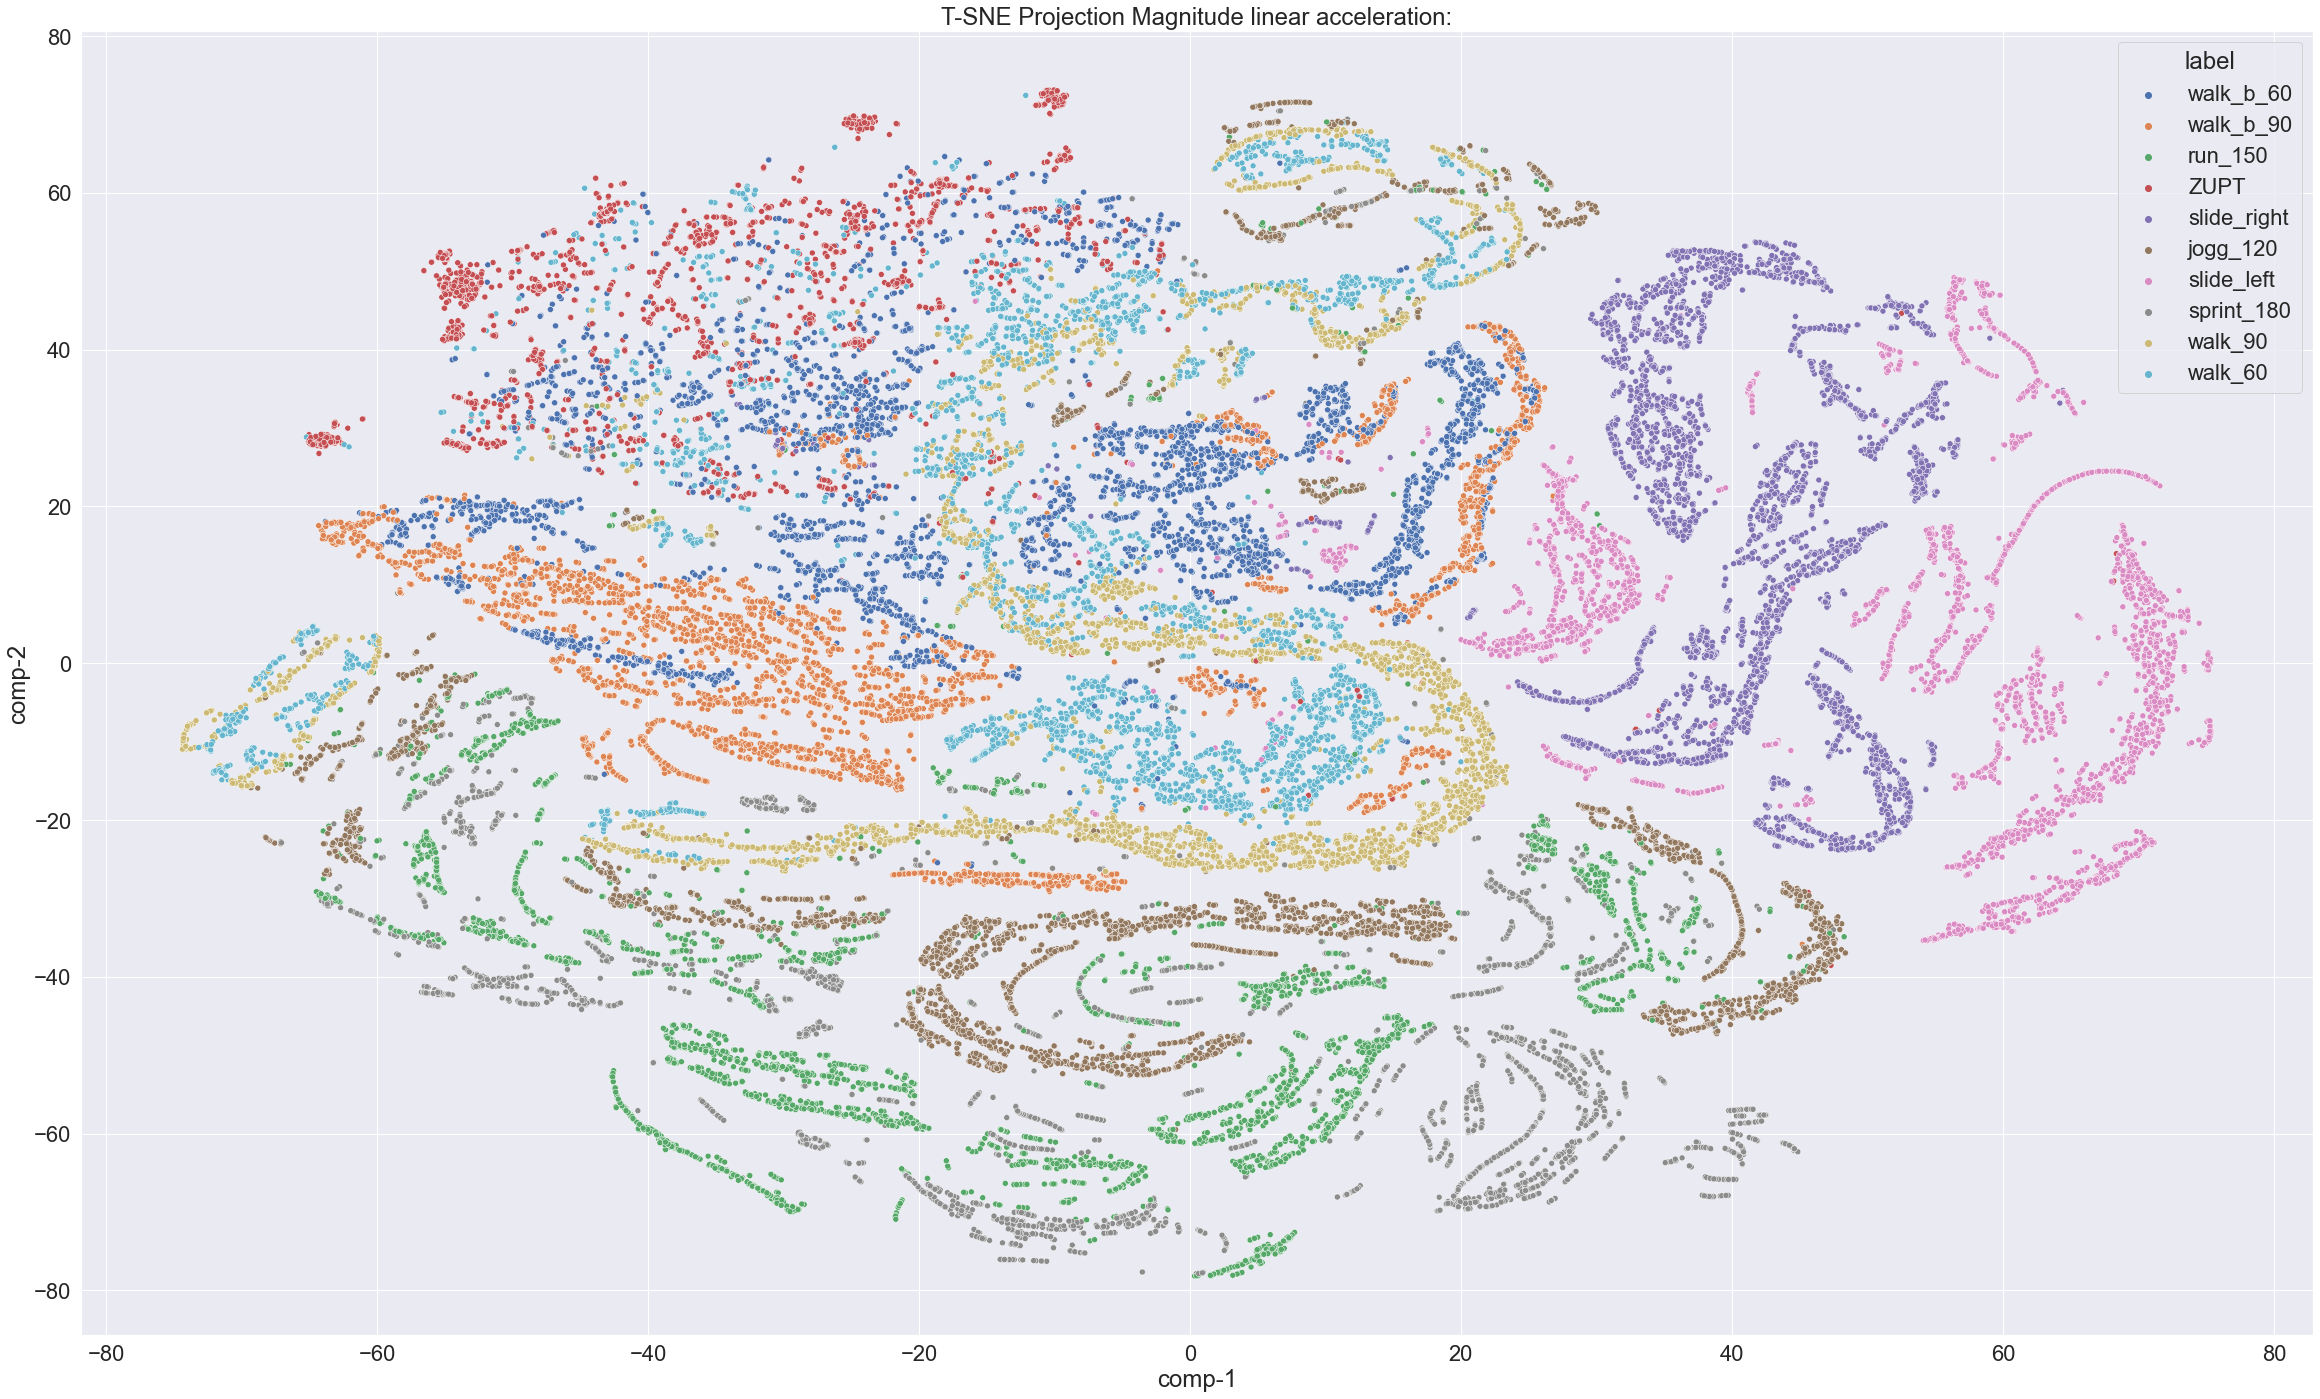

In [65]:
sns.set(font_scale = 2)
sns.scatterplot(x="comp-1", y="comp-2", hue="label", data=df_acc).set(title="T-SNE Projection Magnitude linear acceleration:")

[Text(0.5, 1.0, 'T-SNE Projection Magnitude angular velocity:')]

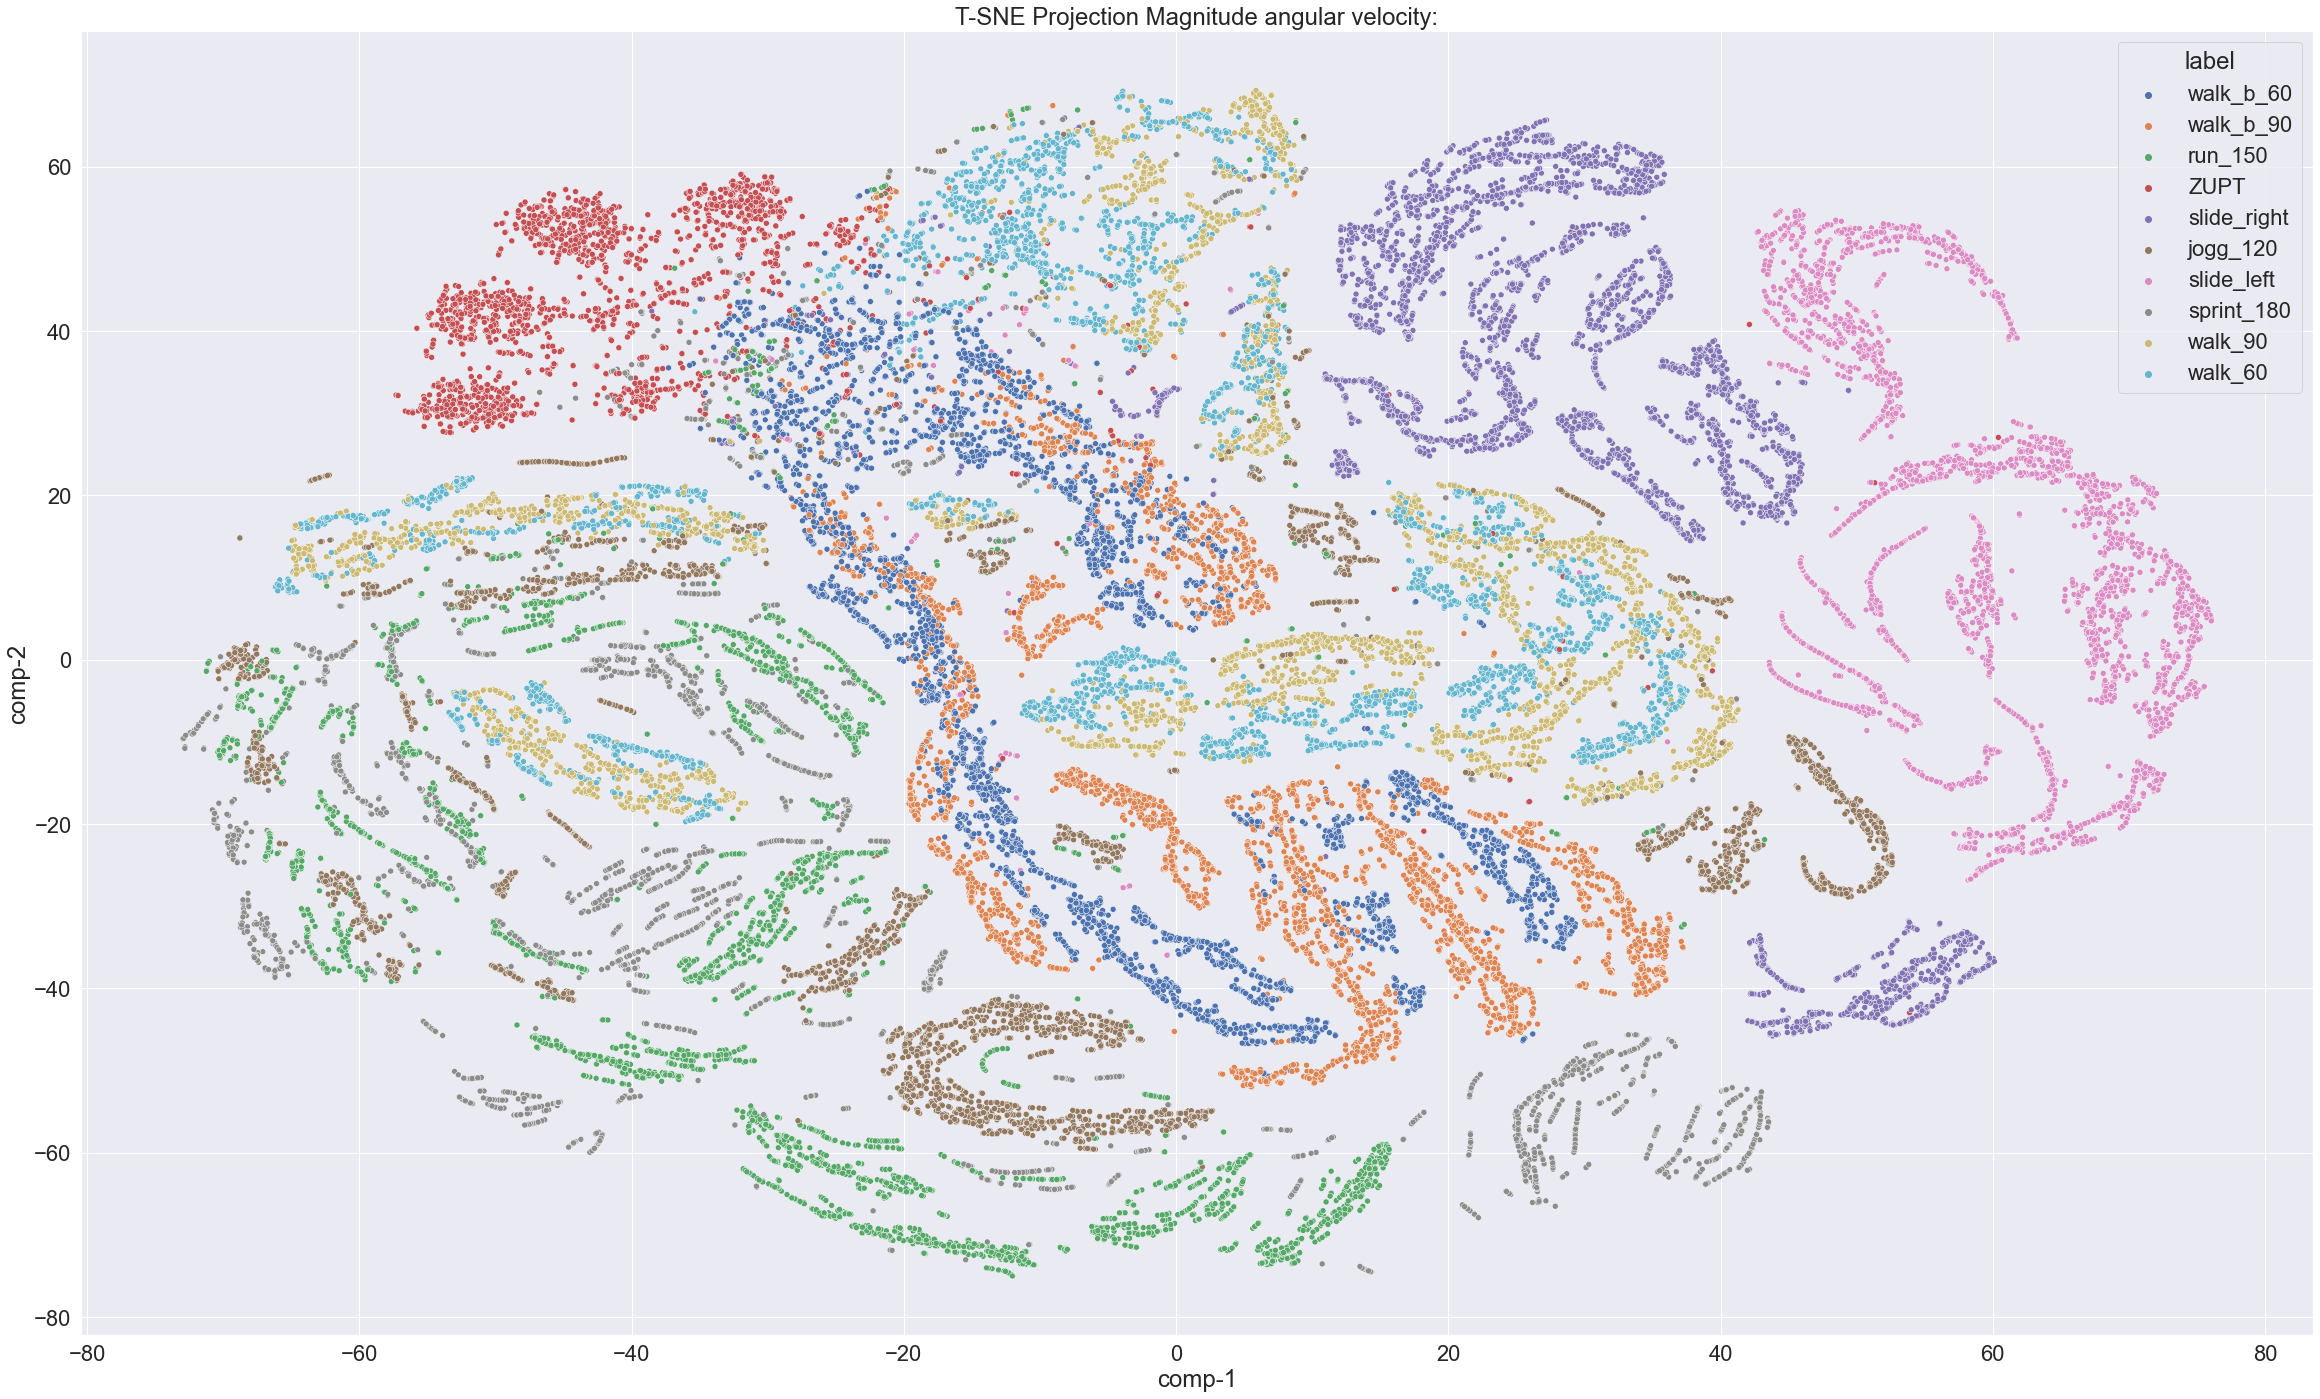

In [66]:
sns.scatterplot(x="comp-1", y="comp-2", hue="label", data=df_gyr).set(title="T-SNE Projection Magnitude angular velocity:")

In [67]:
tsne_ = TSNE(n_components=2, verbose=1, random_state=123)
z_ = tsne_.fit_transform(X_test_act.iloc[:,:num_components*3*2])

c:\Users\Eudald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Eudald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 45600 samples in 0.004s...
[t-SNE] Computed neighbors for 45600 samples in 0.745s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45600
[t-SNE] Computed conditional probabilities for sample 2000 / 45600
[t-SNE] Computed conditional probabilities for sample 3000 / 45600
[t-SNE] Computed conditional probabilities for sample 4000 / 45600
[t-SNE] Computed conditional probabilities for sample 5000 / 45600
[t-SNE] Computed conditional probabilities for sample 6000 / 45600
[t-SNE] Computed conditional probabilities for sample 7000 / 45600
[t-SNE] Computed conditional probabilities for sample 8000 / 45600
[t-SNE] Computed conditional probabilities for sample 9000 / 45600
[t-SNE] Computed conditional probabilities for sample 10000 / 45600
[t-SNE] Computed conditional probabilities for sample 11000 / 45600
[t-SNE] Computed conditional probabilities for sample 12000 / 45600
[t-SNE] Computed conditional probabilities for sam

In [68]:
df_ = pd.DataFrame()
df_["label"] = X_test_act.iloc[:,num_components*3*2+1]
df_["comp-1"] = z_[:,0]
df_["comp-2"] = z_[:,1]
df_.head(2)

label     comp-1     comp-2
0  walk_b_60 -44.147446  30.882412
1  walk_b_60 -22.577677 -21.428551

[Text(0.5, 1.0, "T-SNE Projection of the test data's PCA:")]

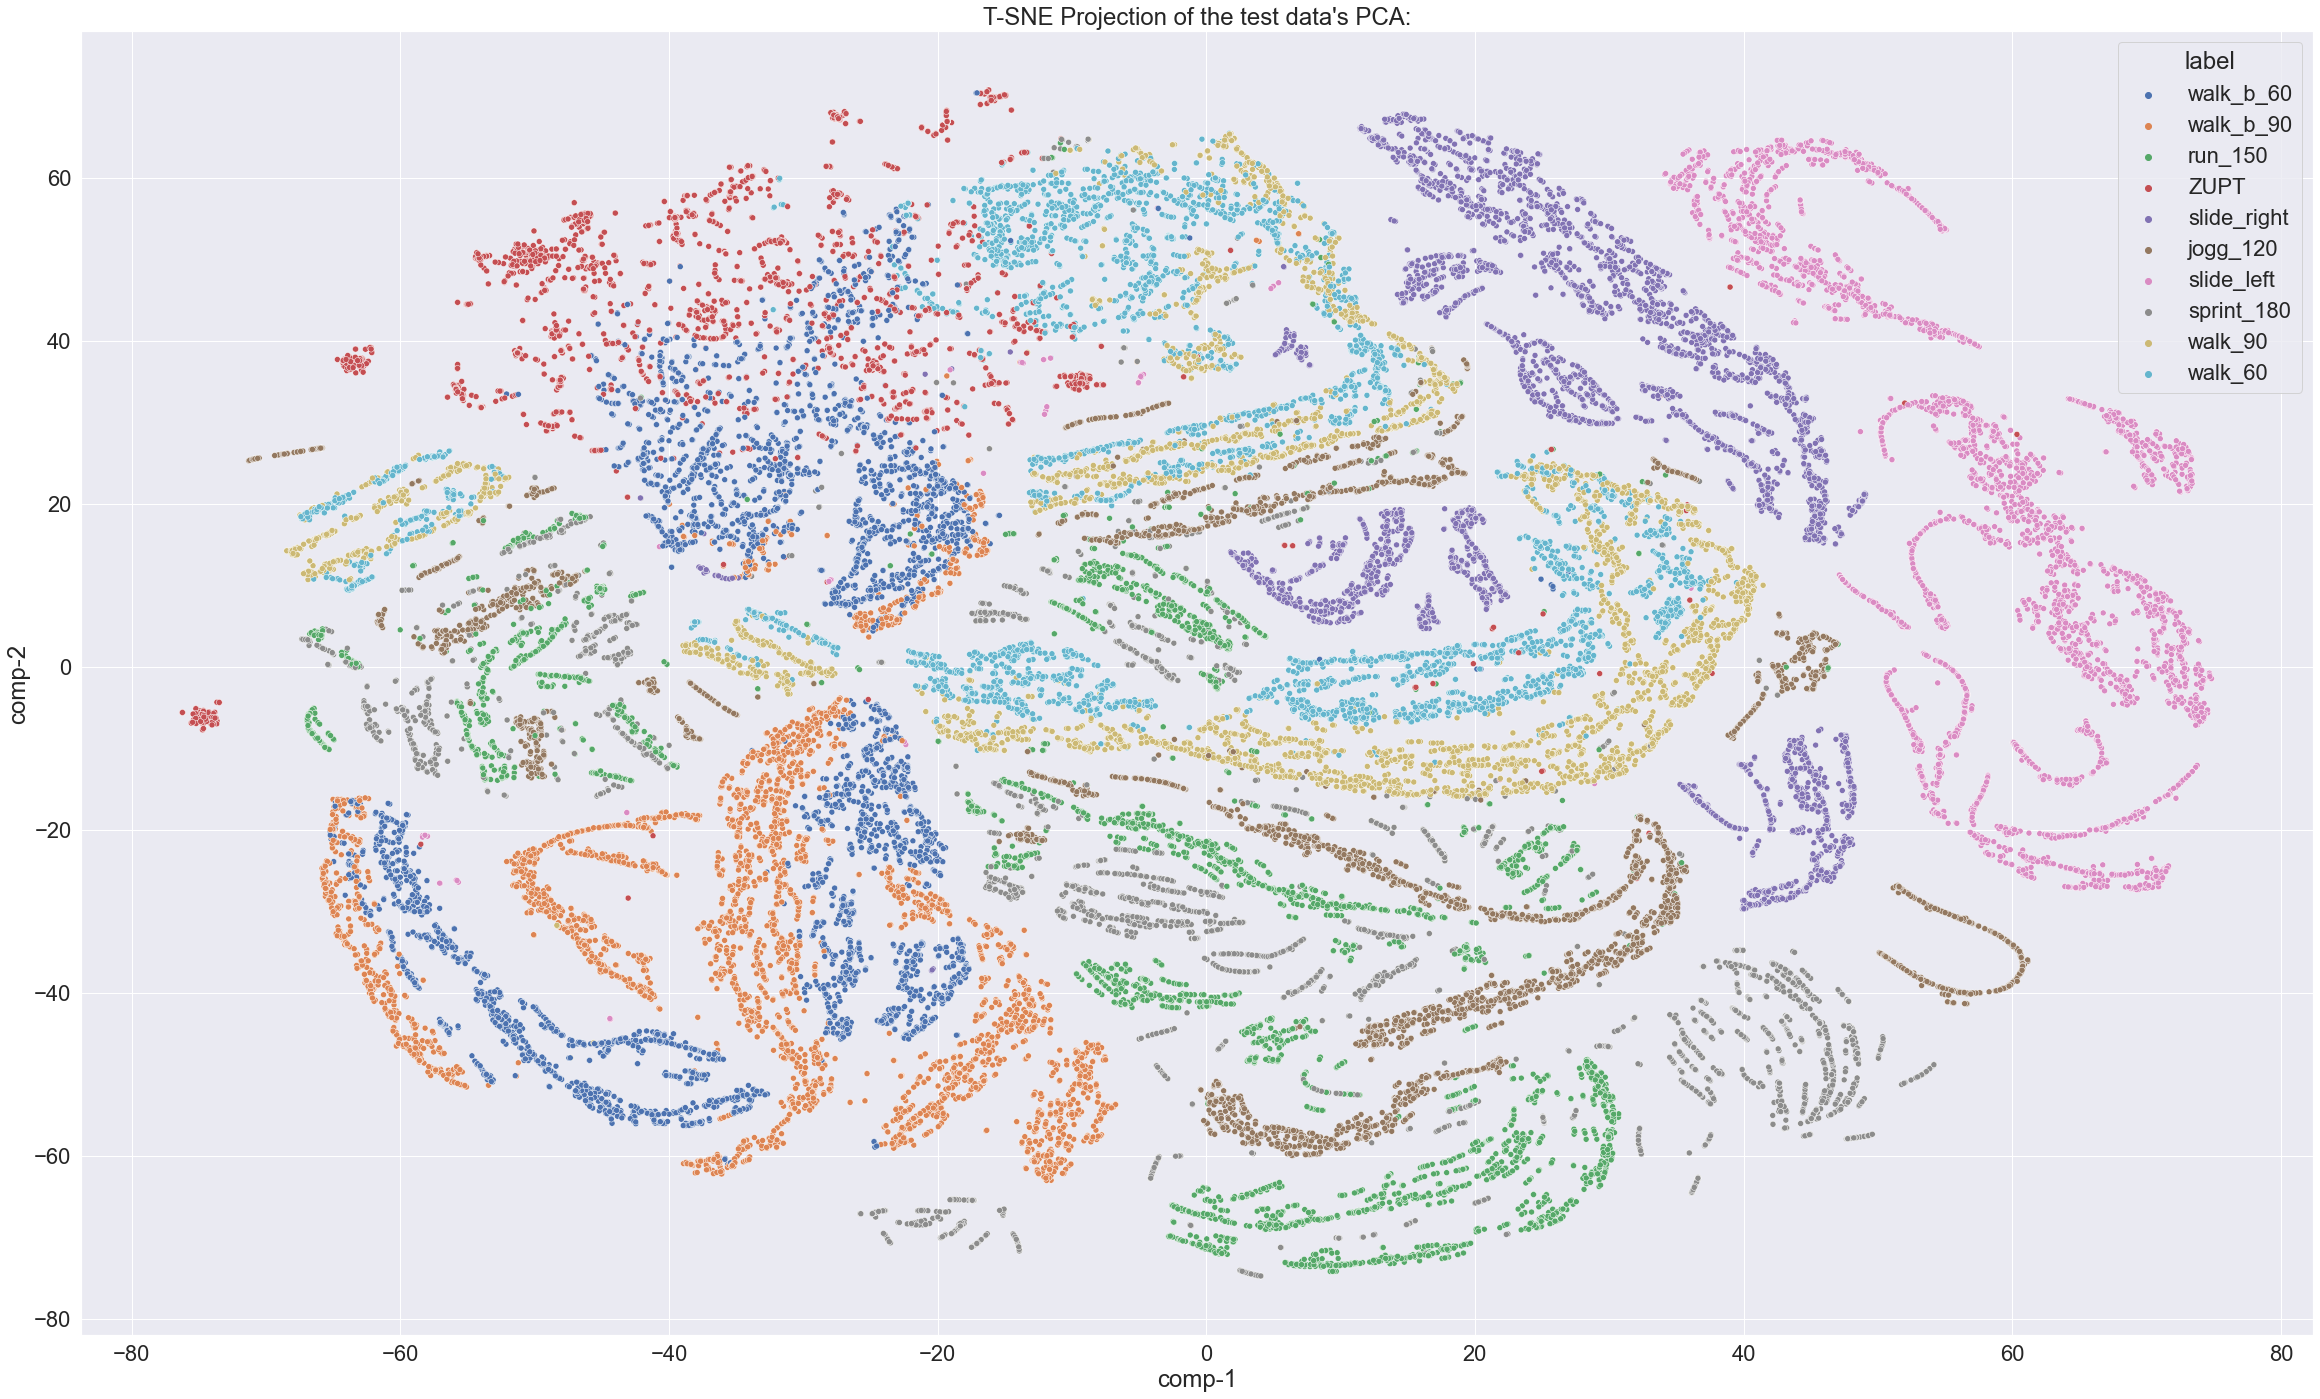

In [69]:
sns.scatterplot(x="comp-1", y="comp-2", hue="label", data=df_).set(title="T-SNE Projection of the test data's PCA:") 